# Ph√¢n c√¥ng c√¥ng vi·ªác:
- 1712396_V≈© Duy + 1712376_Ph·∫°m Nguy·ªÖn H·∫£i D∆∞∆°ng: Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu, Tr·ª±c quan h√≥a d·ªØ li·ªáu v√† C√¢u h·ªèi 1
- 19120207_H·ªì Ho√†ng Duy: C√¢u h·ªèi 2
- 1712355_L√¢m Thi√™n ƒê·ª©c: C√¢u h·ªèi 3, 4, 5 v√† x·ª≠ l√Ω notebook
- 1712258_Nguy·ªÖn VƒÉn H·∫≠u: C√¢u h·ªèi 6

---

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

Th√™m c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [3]:
import json 
import requests
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

L·∫•y d·ªØ li·ªáu t·ª´ c√°c file

In [4]:
df_pl = pd.read_csv('playlist.csv')
df_u = pd.read_csv('user.csv')
DuyDuong_playlist_df = pd.read_csv('playlist.csv')
DuyDuong_track_df = pd.read_csv('track.csv')
DuyDuong_user_df = pd.read_csv('user.csv')

### X·ª≠ l√Ω playlist

***S·ªë d√≤ng v√† c·ªôt***

In [5]:
DuyDuong_playlist_df.shape

(1371, 33)

***Ki·ªÉu d·ªØ li·ªáu***

In [6]:
DuyDuong_playlist_df.dtypes

artwork_url          object
created_at           object
description          object
duration              int64
embeddable_by        object
genre                object
id                    int64
kind                 object
label_name           object
last_modified        object
license              object
likes_count           int64
managed_by_feeds       bool
permalink            object
permalink_url        object
public                 bool
purchase_title       object
purchase_url         object
release_date         object
reposts_count         int64
secret_token        float64
sharing              object
tag_list             object
title                object
uri                  object
user_id               int64
set_type             object
is_album               bool
published_at         object
display_date         object
user                 object
tracks               object
track_count           int64
dtype: object

***√ù nghƒ©a c√°c c·ªôt:***

**artwork_url**
- url ·∫£nh n·ªÅn c·ªßa playlist (ki·ªÉu string, c√≥ th·ªÉ null)

**created_at**
- Ng√†y t·∫°o (ki·ªÉu date)

**description**
- M√¥ t·∫£ (ki·ªÉu string, c√≥ th·ªÉ null)

**duration**
- th·ªùi l∆∞·ª£ng play list (ki·ªÉu s·ªë)

**embeddable_by**
- C√≥ th·ªÉ nh√∫ng b·∫±ng (embeddable_by: "all" | "me" | "none")

**genre**
- Th·ªÉ  lo·∫°i

**id**
- Id playlist

**kind**
- th·ªÉ lo·∫°i, ph·∫£i l√† playlist

**label_name**
- Nh√£n playlist

**last_modified**
- Ch·ªânh s·ª≠a l·∫ßn cu·ªëi, th·ªùi gian

**license**
- Gi·∫•y ph√©p s·ª≠ d·ª•ng

**likes_count**
- S·ªë l∆∞·ª£t th√≠ch

**managed_by_feeds**

**permalink**

**permalink_url**
- Link vƒ©nh vi·ªÖn 

**public**
- C√≥ c√¥ng khai kh√¥ng

**purchase_title**
- Ti√™u ƒë·ªÅ mua b√°n

**purchase_url**
- Link mua

**release_date**
- Ng√†y ph√°t h√†nh

**reposts_count**
- S·ªë l·∫ßn ƒëƒÉng l·∫°i

**secret_token**
- token b√≠ m·∫≠t

**sharing**
- ƒê·ªëi t∆∞·ª£ng chia s·∫ª

**tag_list**
- th·∫ª tag

**title**
- ti√™u ƒë·ªÅ

**uri**
- uri

**user_id**
- id user t·∫°o playlist

**set_type**
- Th·ªÉ lo·∫°i (album, set)

**is_album**
- l√† album?

**published_at**
- Ng√†y published

**display_date**
- Ng√†y ph√°t

**user**
- Th√¥ng tin user

**tracks**
- Danh s√°ch track

**track_count**
- S·ªë l∆∞·ª£ng tracks

***X·ª≠ l√Ω tr√πng l·∫Øp***

In [7]:
dup_playlist_DD = DuyDuong_playlist_df.drop_duplicates()

***X·ª≠ l√Ω ngo·∫°i l·ªá***

In [8]:
# X·ª≠ l√Ω ng√†y ph√°t h√†nh ph·∫£i l·ªõn h∆°n ng√†y t·∫°o
Exception_df_pl1 = dup_playlist_DD.query("created_at<=last_modified")
# X·ª≠ l√Ω ng√†y ƒë∆∞·ª£c ph√°t h√†nh ph·∫£i l·ªõn h∆°n ng√†y t·∫°o
DuyDuong_playlist_df = Exception_df_pl1.query("created_at <= published_at")

***T√≠nh ph√¢n v·ªã***


In [9]:
#duration
df_playlist_duration = DuyDuong_playlist_df.duration.describe()
#track_count
df_playlist_track_count = DuyDuong_playlist_df.track_count.describe()

def duration(row):
    duration=df_playlist_duration[row]
    return duration.round(1)

def track_count(row):
    track_count=df_playlist_track_count[row]
    return track_count

data = {'duration': pd.Series([duration('min'), duration('25%'), duration('50%'), duration('75%'), duration('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'track_count': pd.Series([track_count('min'), track_count('25%'), track_count('50%'), track_count('75%'), track_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_playlist_df = pd.DataFrame(data)
per_playlist_df

duration  track_count
min                  8412.0          1.0
lower_quartile     535398.5          2.0
median            2061504.5          7.0
upper_quartile    5588362.2         20.0
max             372038240.0        500.0

### X·ª≠ l√Ω track

***S·ªë d√≤ng v√† c·ªôt***

In [10]:
DuyDuong_track_df.shape

(12721, 48)

***Ki·ªÉu d·ªØ li·ªáu***

In [11]:
DuyDuong_track_df.dtypes

artwork_url             object
caption                 object
commentable               bool
comment_count          float64
created_at              object
description             object
downloadable              bool
download_count         float64
duration                 int64
full_duration            int64
embeddable_by           object
genre                   object
has_downloads_left        bool
id                       int64
kind                    object
label_name              object
last_modified           object
license                 object
likes_count            float64
permalink               object
permalink_url           object
playback_count         float64
public                    bool
publisher_metadata      object
purchase_title          object
purchase_url            object
release_date            object
reposts_count            int64
secret_token           float64
sharing                 object
state                   object
streamable                bool
tag_list

***√ù nghƒ©a c√°c c·ªôt:***

**artwotk_link**
- link ·∫£nh n·ªÅn

**caption**

**commentable**
- C√≥ b√¨nh lu·∫≠n ƒë∆∞·ª£c kh√¥ng

**comment_count**
- S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n

**created_at**
- Ng√†y t·∫°o

**description**
- M√¥ t·∫£

**downloadable**
- T·∫£i ƒë∆∞·ª£c kh√¥ng

**download_count**
- S·ªë l∆∞·ª£t t·∫£i

**duration**
- Th·ªùi l∆∞·ª£ng

**full_duration**
- th·ªùi l∆∞·ª£ng ƒë·∫ßy ƒë·ªß

**embeddable_by**
- C√≥ th·ªÉ embed b·ªüi

**genre**
- th·ªÉ lo·∫°i

**has_download_left**
- s·ªë l∆∞·ª£t download c√≤n l·∫°i

**id**
- id

**kind**
- default: track

**label_name**
- T√™n nh√£n

**last_modified**
- L·∫ßn ch·ªânh s·ª≠a cu·ªëi

**license**
- Gi√°y ph√©p

**likes_count**
- S·ªë l∆∞·ª£t th√≠ch

**permalink**
- Link vƒ©nh vi·ªÖn

**permalink_url**
- ƒê∆∞·ªùng link url vƒ©nh vi·ªÖn

**playback_count**
- S·ªë l·∫ßn ch·∫°y

**public**
- C√¥ng khai kh√¥ng

**publisher_metadata**
- Th√¥ng tin ng∆∞·ªùi t·∫°o

**purchase_title**
- T√™n s·∫£n ph·∫©m khi b√°n

**purchase_url**
- ƒê∆∞·ªùng link d·∫´n ƒë·∫øn trang b√°n

**release_date**
- Ng√†y ph√°t h√†nh

**reposts_count**
- s·ªë l∆∞·ª£t ƒëƒÉng l·∫°i

**secret_token**
- token b√≠ m·∫≠t

**sharing**
- share ·ªü ƒë√¢u

**state**
- tr·∫°ng th√°i

**streamable**
- stream ƒë∆∞·ª£c kh√¥ng

**tag_list**
- danh s√°ch th·∫ª

**title**
- ti√™u ƒë·ªÅ

**track_format**
- ƒë·ªãnh d·∫°ng track

**uri**
- ƒë∆∞·ªùng d·∫´n uri

**urn**
- S·ªë th·ª© t·ª± urn

**user_id**
- Ng∆∞·ªùi t·∫°o

**visuals**

**waveform_url**

**display_date**
- ng√†y ch·∫°y

**media**
- th√¥ng tin ƒëa ph∆∞∆°ng ti·ªán

**station_urn**

**station_permanlink**

**track_authorization**

**monetization_model**
- m√¥ h√¨nh ki·∫øm ti·ªÅn

**policy**
- Ch√≠nh s√°ch

**user**
- Th√¥ng tin ng∆∞·ªùi t·∫°o

***X·ª≠ l√Ω tr√πng l·∫Øp***

In [12]:
dup_track_DD = DuyDuong_track_df.drop_duplicates()

***X·ª≠ l√Ω ngo·∫°i l·ªá***

In [13]:
# X·ª≠ l√Ω ng√†y ph√°t h√†nh ph·∫£i l·ªõn h∆°n ng√†y t·∫°o
Exception_df_track1 = dup_track_DD.query("created_at<=display_date")
# X·ª≠ l√Ω th·ªùi l∆∞·ª£ng ƒë·∫ßy ƒë·ªß ph·∫£i l·ªõn h∆°n th·ªùi l∆∞·ª£ng
DuyDuong_track_df = Exception_df_track1.query("full_duration>=duration")

***T√≠nh ph√¢n v·ªã***

In [14]:
#comment_count
df_track_comment_count=DuyDuong_track_df.comment_count.describe()
#full_duration
df_track_full_duration=DuyDuong_track_df.full_duration.describe()
#likes_count
df_track_likes_count=DuyDuong_track_df.likes_count.describe()
#playback_count
df_track_playback_count=DuyDuong_track_df.playback_count.describe()
#reposts_count
df_track_reposts_count=DuyDuong_track_df.reposts_count.describe()

def track_comment_count(row):
    track_comment_count=df_track_comment_count[row]
    return track_comment_count

def track_full_duration(row):
    track_full_duration=df_track_full_duration[row]
    return track_full_duration

def track_likes_count(row):
    track_likes_count=df_track_likes_count[row]
    return track_likes_count

def track_playback_count(row):
    track_playback_count=df_track_playback_count[row]
    return track_playback_count.round(1)

def track_reposts_count(row):
    track_reposts_count=df_track_reposts_count[row]
    return track_reposts_count

data = {'comment_count': pd.Series([track_comment_count('min'), track_comment_count('25%'), track_comment_count('50%'), track_comment_count('75%'), track_comment_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'full_duration': pd.Series([track_full_duration('min'), track_full_duration('25%'), track_full_duration('50%'), track_full_duration('75%'), track_full_duration('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'likes_count': pd.Series([track_likes_count('min'), track_likes_count('25%'), track_likes_count('50%'), track_likes_count('75%'), track_likes_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'playback_count': pd.Series([track_playback_count('min'), track_playback_count('25%'), track_playback_count('50%'), track_playback_count('75%'), track_playback_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'reposts_count': pd.Series([track_reposts_count('min'), track_reposts_count('25%'), track_reposts_count('50%'), track_reposts_count('75%'), track_reposts_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_track_df = pd.DataFrame(data)
per_track_df

comment_count  full_duration  likes_count  playback_count  \
min                       0.0         443.00          0.0             0.0   
lower_quartile            4.0      165188.75        269.0         11752.8   
median                   30.0      208366.00       2180.0        114264.0   
upper_quartile          240.0      269072.00      17046.0       1017175.0   
max                  183153.0    24167385.00    2958464.0     283891408.0   

                reposts_count  
min                      0.00  
lower_quartile          11.00  
median                  74.00  
upper_quartile         543.75  
max                 224403.00

### X·ª≠ l√≠ user

***S·ªë d√≤ng v√† c·ªôt***

In [15]:
DuyDuong_user_df.shape

(8384, 32)

***Ki·ªÉu d·ªØ li·ªáu***

In [16]:
DuyDuong_user_df.dtypes

avatar_url                object
city                      object
comments_count             int64
country_code              object
created_at                object
creator_subscriptions     object
creator_subscription      object
description               object
followers_count            int64
followings_count           int64
first_name                object
full_name                 object
groups_count               int64
id                         int64
kind                      object
last_modified             object
last_name                 object
likes_count                int64
playlist_likes_count       int64
permalink                 object
permalink_url             object
playlist_count             int64
reposts_count            float64
track_count                int64
uri                       object
urn                       object
username                  object
verified                    bool
visuals                   object
badges                    object
station_ur

***√ù nghƒ©a c√°c c·ªôt:***

**avatar_url**
- link ·∫£nh ƒë·∫°i di·ªán

**city**
- ƒê·∫øn t·ª´ th√†nh ph·ªë n√†o

**comments_count**
- S·ªë l∆∞·ª£ng comments, xem ·ªïng b√¨nh lu·∫≠n nhi·ªÅu hay √≠t

**country_code**
- M√£ code c·ªßa country, v√≠ d·ª• VietNam l√† VN, M·ªπ l√† US

**create_at**
- Ng√†y t·∫°o account

**creator_subscriptions**
- User ƒë√£ ƒëƒÉng k√≠ nh·ªØng lo·∫°i n√†o (free, premium,...)

**creator_subscription**
- User ƒëang ƒëƒÉng k√≠ lo·∫°i n√†o

**decription**
- M√¥ t·∫£

**folowers_count**
- S·ªë l∆∞·ª£ng ng∆∞·ªùi theo d√µi user n√†y

**folowings_count**
- S·ªë l∆∞·ª£ng ng∆∞·ªùi user n√†y theo d√µi 

**first_name**
- T√™n ƒë·∫ßu

**full_name**
- t√™n ƒë·∫ßy ƒë·ªß

**groups_count**
- S·ªë l∆∞·ª£ng group

**id**
- id

**kind**
- default: user

**last_modified**
- L·∫ßn cu·ªëi ch·ªânh s·ª≠a th√¥ng tin c√° nh√¢n

**last_name**
- t√™n cu·ªëi (h·ªç)

**like_counts**
- s·ªë l∆∞·ª£t th√≠ch

**playlist_like_counts**
- S·ªë l∆∞·ª£t th√≠ch playlist

**permalink**
- link vƒ©nh vi·ªÖn

**permalink_url**
- link url vƒ©nh vi·ªÖn

**playlist_count**
- S·ªë l∆∞·ª£ng playlist c·ªßa √¥ng n√†y

**repost_count**
- √îng n√†y repost bao nhi√™u l·∫ßn

**track_count**
- √îng n√†y c√≥ bao nhi√™u track

**uri**
- uri

**urn**
- urn

**username**
- account

**verified**
- x√°c nh·∫≠n ch∆∞a (mail, sƒët,...)

**visuals**

**badges**
- Huy hi·ªáu

**station_urn**

**station_permalink**

***X·ª≠ l√Ω tr√πng l·∫Øp***

In [17]:
dup_user_DD=DuyDuong_user_df.drop_duplicates()

***X·ª≠ l√Ω ngo·∫°i l·ªá***

In [18]:
# X·ª≠ l√Ω ng√†y ph√°t h√†nh ph·∫£i l·ªõn h∆°n ng√†y t·∫°o
DuyDuong_user_df = dup_user_DD.query("created_at<=last_modified")

***T√≠nh ph√¢n v·ªã***

In [19]:
#comments_count
df_user_comments_count=DuyDuong_user_df.comments_count.describe()
#followers_count
df_user_followers_count=DuyDuong_user_df.followers_count.describe()
#followings_count
df_user_followings_count=DuyDuong_user_df.followings_count.describe()
#likes_count
df_user_likes_count=DuyDuong_user_df.likes_count.describe()
#playlist_count
df_user_playlist_count=DuyDuong_user_df.playlist_count.describe()
#track_count
df_user_track_count=DuyDuong_user_df.track_count.describe()

def user_comments_count(row):
    user_comments_count=df_user_comments_count[row]
    return user_comments_count

def user_followers_count(row):
    user_followers_count=df_user_followers_count[row]
    return user_followers_count

def user_followings_count(row):
    user_followings_count=df_user_followings_count[row]
    return user_followings_count

def user_likes_count(row):
    user_likes_count=df_user_likes_count[row]
    return user_likes_count

def user_playlist_count(row):
    user_playlist_count=df_user_playlist_count[row]
    return user_playlist_count

def user_track_count(row):
    user_track_count=df_user_track_count[row]
    return user_track_count

data = {'comments_count': pd.Series([user_comments_count('min'), user_comments_count('25%'), user_comments_count('50%'), user_comments_count('75%'), user_comments_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'followers_count': pd.Series([user_followers_count('min'), user_followers_count('25%'), user_followers_count('50%'), user_followers_count('75%'), user_followers_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'followings_count': pd.Series([user_followings_count('min'), user_followings_count('25%'), user_followings_count('50%'), user_followings_count('75%'), user_followings_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'likes_count': pd.Series([user_likes_count('min'), user_likes_count('25%'), user_likes_count('50%'), user_likes_count('75%'), user_likes_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'playlist_count': pd.Series([user_playlist_count('min'), user_playlist_count('25%'), user_playlist_count('50%'), user_playlist_count('75%'), user_playlist_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'track_count': pd.Series([user_track_count('min'), user_track_count('25%'), user_track_count('50%'), user_track_count('75%'), user_track_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_user_df = pd.DataFrame(data)
per_user_df

comments_count  followers_count  followings_count  \
min                        0.0             0.00               0.0   
lower_quartile             0.0           147.00               0.0   
median                     3.0          1297.50               9.0   
upper_quartile            34.0         11442.25              73.0   
max                    40582.0       9989392.00            2000.0   

                likes_count  playlist_count  track_count  
min                    0.00             0.0          1.0  
lower_quartile         1.00             0.0         11.0  
median                31.00             2.0         33.0  
upper_quartile       258.75            10.0         86.0  
max                43232.00          7965.0      87857.0

## Tr·ª±c quan h√≥a d·ªØ li·ªáu

### Ph√¢n b·ªë c√°c d∆°n bi·∫øn trong playlist

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

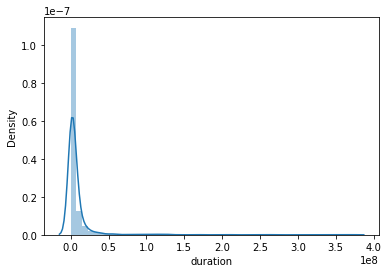

In [20]:
sns.distplot(DuyDuong_playlist_df['duration'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_count', ylabel='Density'>

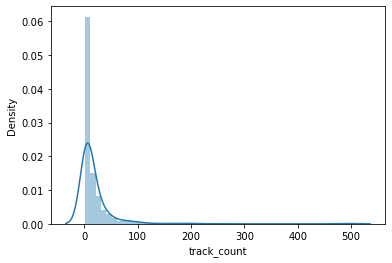

In [21]:
sns.distplot(DuyDuong_playlist_df['track_count'])

### Ph√¢n b·ªë c√°c ƒë∆°n bi·∫øn trong track

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

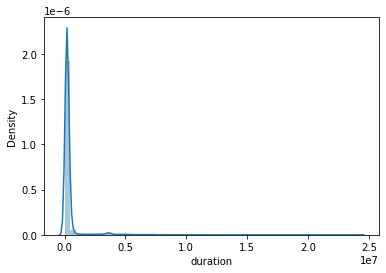

In [22]:
sns.distplot(DuyDuong_track_df['duration'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playback_count', ylabel='Density'>

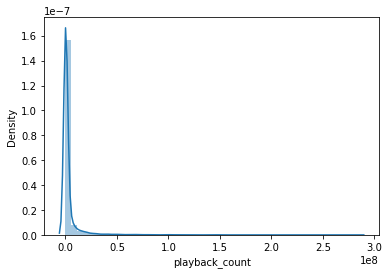

In [23]:
sns.distplot(DuyDuong_track_df['playback_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reposts_count', ylabel='Density'>

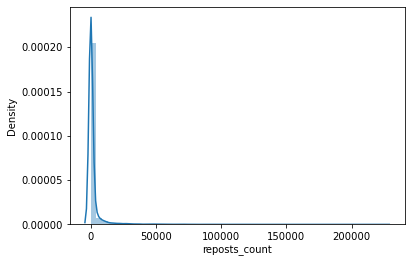

In [24]:
sns.distplot(DuyDuong_track_df['reposts_count'])

### Ph√¢n b·ªë c√°c ƒë∆°n bi·∫øn trong user

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comments_count', ylabel='Density'>

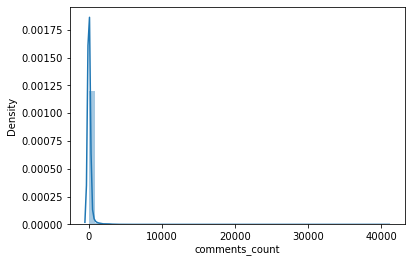

In [25]:
sns.distplot(DuyDuong_user_df['comments_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followers_count', ylabel='Density'>

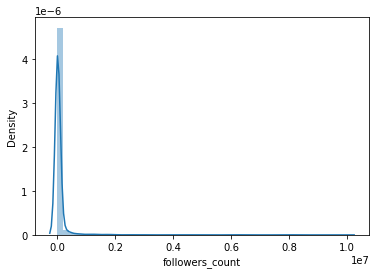

In [26]:
sns.distplot(DuyDuong_user_df['followers_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followings_count', ylabel='Density'>

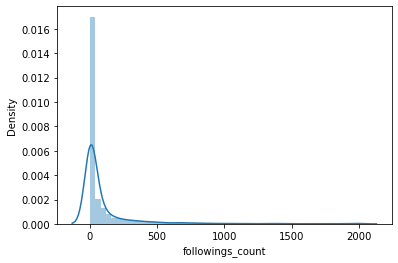

In [27]:
sns.distplot(DuyDuong_user_df['followings_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes_count', ylabel='Density'>

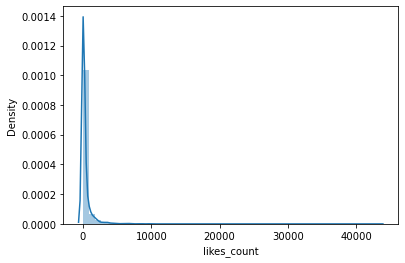

In [28]:
sns.distplot(DuyDuong_user_df['likes_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playlist_likes_count', ylabel='Density'>

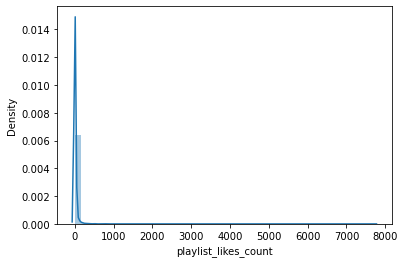

In [29]:
sns.distplot(DuyDuong_user_df['playlist_likes_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playlist_count', ylabel='Density'>

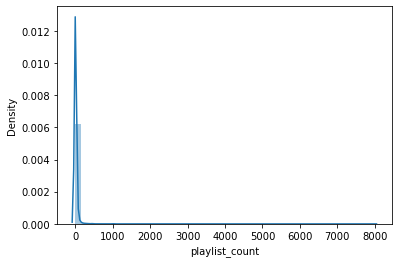

In [30]:
sns.distplot(DuyDuong_user_df['playlist_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_count', ylabel='Density'>

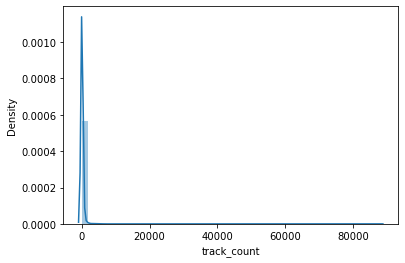

In [31]:
sns.distplot(DuyDuong_user_df['track_count'])

### C√°c t∆∞∆°ng quan ƒëa bi·∫øn trong playlist

S·ªë track trong playlist v√† th·ªùi l∆∞·ª£ng.

Th∆∞·ªùng th√¨ c√†ng nhi·ªÅu track th√¨ th·ªùi l∆∞·ª£ng c√†ng d√†i?

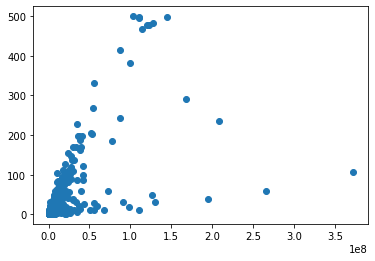

In [32]:
plt.scatter(DuyDuong_playlist_df.duration, DuyDuong_playlist_df.track_count)

### C√°c t∆∞∆°ng quan ƒëa bi·∫øn trong track

T∆∞∆°ng quan gi·ªØa comment_count v√† likes_count. 

Mu·ªën bi·∫øt xem c√≥ ph·∫£i c√†ng nhi·ªÅu like th√¨ c√†ng nhi·ªÅu comment?

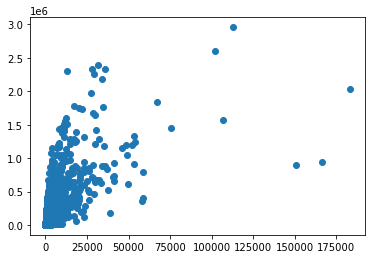

In [33]:
plt.scatter(DuyDuong_track_df.comment_count, DuyDuong_track_df.likes_count)

T∆∞∆°ng quan gi·ªØa duration v√† playback

Mu·ªën bi·∫øt xem th·ªùi l∆∞·ª£ng d√†i hay ng·∫Øn th√¨ ng∆∞·ªùi ta xem nhi·ªÅu h∆°n

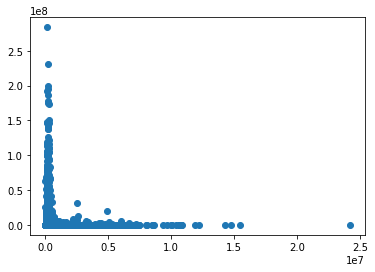

In [34]:
plt.scatter(DuyDuong_track_df.duration, DuyDuong_track_df.playback_count)

T∆∞∆°ng quan gi·ªØa likes_count v√† repost_count

Xem c√≥ ph·∫£i c√†ng nhi·ªÅu l∆∞·ª£t th√≠ch, ng∆∞·ªùi ta l·∫°i th√≠ch repost?

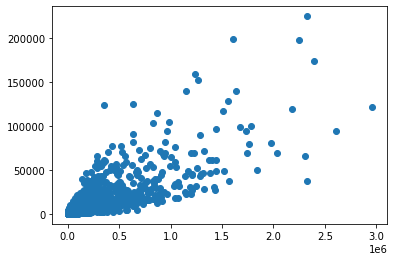

In [35]:
plt.scatter(DuyDuong_track_df.likes_count, DuyDuong_track_df.reposts_count)

T∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£t th√≠ch v√† s·ªë l∆∞·ª£t playback

xem c√≥ ph·∫£i c√†ng nhi·ªÅu ng∆∞·ªùi th√≠ch, h·ªç l·∫°i c√†ng mu·ªën nghe

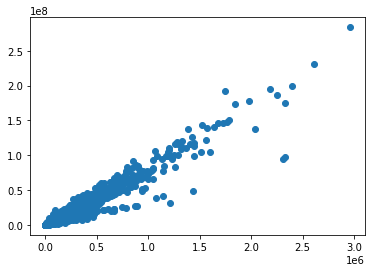

In [36]:
plt.scatter(DuyDuong_track_df.likes_count, DuyDuong_track_df.playback_count)

### C√°c t∆∞∆°ng quan ƒëa bi·∫øn trong user

T∆∞∆°ng quan gi·ªØa follower v√† s·ªë l∆∞·ª£t th√≠ch

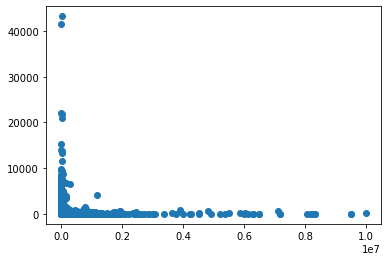

In [37]:
plt.scatter(DuyDuong_user_df.followers_count, DuyDuong_user_df.likes_count)

T∆∞∆°ng quan gi·ªØa playlist v√† track user ƒë√≥ c√≥

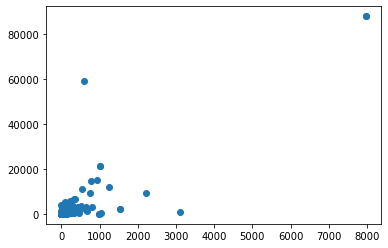

In [38]:
plt.scatter(DuyDuong_user_df.playlist_count, DuyDuong_user_df.track_count)

T∆∞∆°ng quan gi·ªØa follower v√† s·ªë track ng∆∞·ªùi ƒë√≥ c√≥

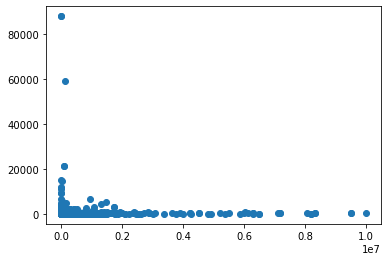

In [39]:
plt.scatter(DuyDuong_user_df.followers_count, DuyDuong_user_df.track_count)

T∆∞∆°ng quan gi·ªØa comment_count v√† like count

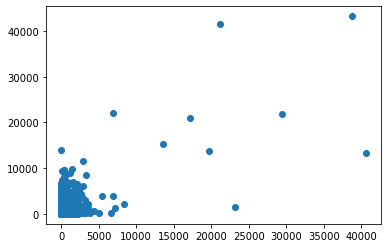

In [40]:
plt.scatter(DuyDuong_user_df.comments_count, DuyDuong_user_df.likes_count)

## C√¢u h·ªèi 1: 
ƒê·∫∑t v·∫•n ƒë·ªÅ: Quan h·ªá gi·ªØa s·ªë l∆∞·ª£ng l∆∞·ª£t th√≠ch v√† l∆∞·ª£t nghe l·∫°i c·ªßa m·ªôt track.

K·∫øt qu·∫£ mong ƒë·ª£i: N·∫øu 1 track c√≥ l∆∞·ª£t nghe l·∫°i nhi·ªÅu th√¨ track ƒë√≥ s·∫Ω c√≥ nhi·ªÅu l∆∞·ª£t th√≠ch 

***Ti·ªÅn x·ª≠ l√Ω***

In [41]:
data = {'playback_count': DuyDuong_track_df['playback_count'],  
        'likes_count': DuyDuong_track_df['likes_count']}
df_sort_track=pd.DataFrame(data)
df_sort_track= df_sort_track[df_sort_track['playback_count'].notna()]
df_sort_track = df_sort_track[df_sort_track['likes_count'].notna()]
df_sort_track.sort_values(by=['playback_count'])

playback_count  likes_count
1295              0.0          0.0
10998             0.0          0.0
10999             0.0          0.0
11000             0.0          0.0
11001             0.0          0.0
...               ...          ...
664       192416111.0    1745324.0
1205      195879556.0    2181797.0
5096      200195586.0    2396170.0
1154      231274758.0    2610307.0
4351      283891408.0    2958464.0

[10298 rows x 2 columns]

***Tr·ª±c quan***

<AxesSubplot:xlabel='playback_count', ylabel='likes_count'>

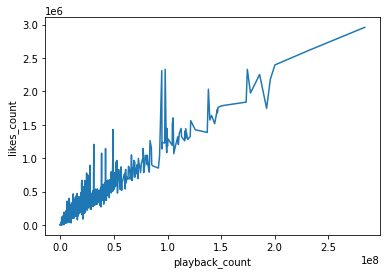

In [42]:
sns.lineplot(x=df_sort_track['playback_count'], y=df_sort_track['likes_count'])

***K·∫øt lu·∫≠n: Nh√¨n v√†o ƒë·ªì th·ªã ta c√≥ th·ªÉ th·∫•y ƒëa s·ªë c√°c b√†i h√°t c√≥ l∆∞·ª£t nghe l·∫°i c√†ng cao th√¨ s·∫Ω c√≥ c√†ng nhi·ªÅu l∆∞·ª£t th√≠ch g·∫ßn ƒë√∫ng so v·ªõi k·∫øt qu·∫£ mong ƒë·ª£i.***

## C√¢u h·ªèi 2: Li·ªáu l∆∞·ª£t likes, reposts m·ªôt playlist m√† m·ªôt ng∆∞·ªùi d√πng ƒëƒÉng t·∫£i c√≥ m·ªëi t∆∞∆°ng ƒë·ªìng v·ªõi s·ªë followers c·ªßa user ƒë√≥ hay kh√¥ng?

Tr·ª±c quan h√≥a b·∫±ng bi·ªÉu ƒë·ªì heatmap trong seaborn. Ta ch·ªâ hi·ªÉn th·ªã c√°c gi√° tr·ªã c√≥ m·ªëi t∆∞∆°ng quan tr√™n 0.5 ho·∫∑c d∆∞·ªõi -0.4

### V·ªõi t·∫≠p playlist

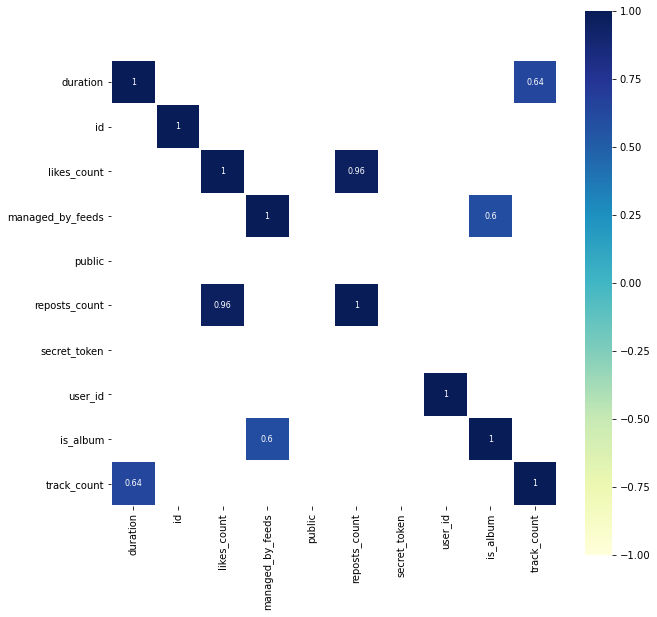

In [43]:
corr = DuyDuong_playlist_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nh·∫≠n x√©t:   
- `repost_count` v√† `likes_count`: playlist ƒë∆∞·ª£c y√™u th√≠ch nhi·ªÅu th√¨ s·∫Ω ƒë∆∞·ª£c c√°c t√†i kho·∫£n kh√°c chia s·∫ª nhi·ªÅu v√† ng∆∞·ª£c l·∫°i   
- `reposts_count` v√† `playback_count`: playlist ƒë∆∞·ª£c nghe c√†ng nhi·ªÅu th√¨ c√†ng ƒëu·ª£c t√†i kho·∫£n kh√°c chia s·∫ª nhi·ªÅu h∆°n v√† ng∆∞·ª£c l·∫°i.   

### V·ªõi t·∫≠p track

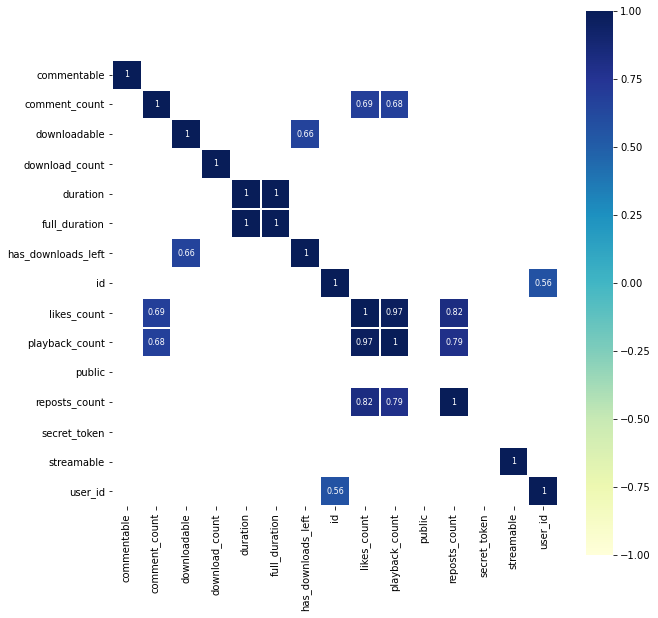

In [44]:
corr = DuyDuong_track_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nh·∫≠n x√©t:   
- `likes_count` v√† `playback_count`: track ƒë∆∞·ª£c y√™u th√≠ch nhi·ªÅu th√¨ s·∫Ω ƒë∆∞·ª£c nghe c√†ng nhi·ªÅu v√† ng∆∞·ª£c l·∫°i   
- `repost_count` v√† `likes_count`: track ƒë∆∞·ª£c y√™u th√≠ch nhi·ªÅu th√¨ s·∫Ω ƒë∆∞·ª£c c√°c t√†i kho·∫£n kh√°c chia s·∫ª nhi·ªÅu v√† ng∆∞·ª£c l·∫°i   
- `reposts_count` v√† `playback_count`: track ƒë∆∞·ª£c nghe c√†ng nhi·ªÅu th√¨ c√†ng ƒëu·ª£c t√†i kho·∫£n kh√°c chia s·∫ª nhi·ªÅu h∆°n v√† ng∆∞·ª£c l·∫°i.   

### V·ªõi t·∫≠p user

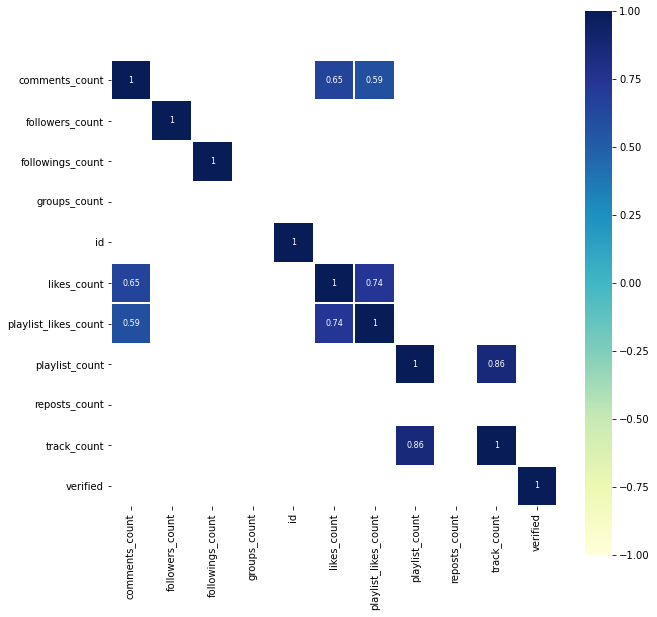

In [45]:
corr = DuyDuong_user_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nh·∫≠n x√©t:
- `playlist_count` v√† `track_count`: m·ªôt t√†i kho·∫£n c√≥ s·ªë l∆∞·ª£ng track c√†ng nhi·ªÅu th√¨ s·ªë l∆∞·ª£ng playlist c√†ng nhi·ªÅu v√† ng∆∞·ª£c l·∫°i.
- Kh√¥ng c√≥ s·ª± li√™n quan gi·ªØa `followers_count` v√† `playlist_count`: t√†i kho·∫£n c√≥ s·ªë ng∆∞·ªùi theo d√µi nhi·ªÅu th√¨ ch∆∞a ch·∫Øc s·ªë playlist s·∫Ω nhi·ªÅu v√† ng∆∞·ª£c l·∫°i
- Kh√¥ng c√≥ s·ª± li√™n quan gi·ªØa `followers_count` v√† `likes_count`: t√†i kho·∫£n c√≥ s·ªë ng∆∞·ªùi theo d√µi nhi·ªÅu th√¨ ch∆∞a ch·∫Øc s·ªë playlist ƒë∆∞·ª£c y√™u th√≠ch s·∫Ω nhi·ªÅu v√† ng∆∞·ª£c l·∫°i
- `likes_count`, `comments_count`, `playlist_likes_count`: m·ªôt t√†i kho·∫£n c√≥ s·ªë l∆∞·ª£ng y√™u th√≠ch c√†ng nhi·ªÅu th√¨ s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n c√†ng nhi·ªÅu, s·ªë playlist ƒë∆∞·ª£c y√™u th√≠ch c≈©ng nhi·ªÅu, v√† ng∆∞·ª£c l·∫°i ƒë√¥i m·ªôt.

### Tr·∫£ l·ªùi:

- T·ª´ ph√¢n t√≠ch d·ªØ li·ªáu trong t·∫≠p `user.csv` th√¨ ta c√≥ th·ªÉ r√∫t ra nh·∫≠n x√©t l√† s·ªë l∆∞·ª£ng ng∆∞·ªùi theo d√µi (followers) c·ªßa ng∆∞·ªùi d√πng tr√™n SoundCloud kh√¥ng c√≥ s·ª± li√™n h·ªá r√µ r√†ng n√†o v·ªõi s·ªë l∆∞·ª£t th√≠ch (likes) hay ƒëƒÉng t·∫£i l·∫°i (reposts) c·ªßa track/playlists. 
- Playlist v√† track ƒë∆∞·ª£c y√™u th√≠ch nhi·ªÅu th√¨ s·∫Ω ƒë∆∞·ª£c nh·ªØng ng∆∞·ªùi d√πng kh√°c ƒëƒÉng t·∫£i l·∫°i v√† ph√°t l·∫°i nhi·ªÅu h∆°n, r√∫t ra nh·∫≠n x√©t t·ª´ 2 t·∫≠p `track.csv` v√† `playlist.csv` 
- L∆∞·ª£t theo d√µi cao c√≥ th·ªÉ ƒë·∫øn t·ª´ t√†i kho·∫£n c√°c ngh·ªá sƒ© n·ªïi ti·∫øng ƒëang demo nh·∫°c c·ªßa m√¨nh tr√™n n·ªÅn t·∫£ng n√†y, l∆∞·ª£t likes v√† reposts c√≥ th·ªÉ do c√≥ nhi·ªÅu t√†i kho·∫£n ƒë√£ y√™u th√≠ch v√† chia s·∫ª l·∫°i c√°c track c·ªßa ngh·ªá sƒ© ƒë√≥ v√† ƒë∆∞a ch√∫ng trong playlist nh·∫°c c·ªßa h·ªç, d·∫´n ƒë·∫øn playlist ng∆∞·ªùi d√πng ƒë√≥ t·∫°o n√™n c≈©ng s·∫Ω ƒë∆∞·ª£c th√≠ch v√† chia s·∫ª nhi·ªÅu h∆°n.

## C√¢u h·ªèi 3: Top 5 user n√†o upload nhi·ªÅu playlist nh·∫•t?

Suy ra c√≥ user n√†o spam playlist hay kh√¥ng t·ª´ ƒë√≥ lo·∫°i b·ªè nh·ªØng user spam n√†y.

Bi·∫øt ƒë∆∞·ª£c nh·ªØng ng∆∞·ªùi d√πng c√≥ ƒë√≥ng g√≥p nhi·ªÅu nh·∫•t cho n·ªÅn t·∫£ng v√† c√≥ nh·ªØng h·ªó tr·ª£ nh·∫±m t·∫°o ƒëi·ªÅu ki·ªán v√† khuy·∫øn kh√≠ch h·ªç ƒë√≥ng g√≥p th√™m nhi·ªÅu s·∫£n ph·∫©m cho n·ªÅn t·∫£ng.

In [46]:
def find_in_list(x, list):
    for i in range(0, len(list)):
        if list[i] == x:
            return i

user = []
count = []

for i in range(0, len(df_pl)):
    if df_pl['user_id'][i] not in user:
        user.append(df_pl['user_id'][i])
        count.append(1)
    else:
        count[find_in_list(df_pl['user_id'][i], user)] += 1

s = {'user': user, 'count': count}
list_user = pd.DataFrame(s)

list_user.sort_values(by=['count'], inplace = True, ascending = False)
print('Top 5 user upload nhi·ªÅu playlist nh·∫•t')
print(list_user.head(n=5))

Top 5 user upload nhi·ªÅu playlist nh·∫•t
           user  count
42   1037343124      5
910  1034556352      3
85   1045980601      3
388   755369407      2
515   523576800      2


Ta th·∫•y nhi·ªÅu nh·∫•t ch·ªâ l√† 5 playlist n√™n kh√¥ng c√≥ use n√†o spam playlist.


Tr√™n ƒë√¢y l√† 5 user upload nhi·ªÅu playlist nh·∫•t l·∫ßn l∆∞·ª£t l√† user c√≥ ID: 1037343124, 1034556352, 1045980601, 755369407, 523576800.

## C√¢u h·ªèi 4: Top 5 track n√†o ƒë∆∞·ª£c xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c playlist?

C√¢u h·ªèi n√†y gi√∫p m√¨nh bi·∫øt ƒë∆∞·ª£c track n√†o ƒë∆∞·ª£c nhi·ªÅu ng∆∞·ªùi d√πng s·ª≠ d·ª•ng ƒë·ªÉ th√™m v√†o playlist c·ªßa m√¨nh t·ª´ ƒë√≥ suy ra ƒë·ªô ph·ªï bi·∫øn c·ªßa track ƒë√≥ t·ª´ ƒë√≥.


In [47]:
track_list = []
count_track = []

for i in range(0, len(df_pl)):
    for track in str(df_pl['tracks'][i]).split('-'):
        if track not in track_list:
            track_list.append(track)
            count_track.append(1)
        else:
            count_track[find_in_list(track, track_list)] += 1

s = {'track': track_list, 'count': count_track}
list_track = pd.DataFrame(s)

list_track.sort_values(by=['count'], inplace = True, ascending = False)
print('Top 5 track xu√°t hi·ªán nhi·ªÅu nh·∫•t trong c√°c playlist')
print(list_track.head(n=5))

Top 5 track xu√°t hi·ªán nhi·ªÅu nh·∫•t trong c√°c playlist
           track  count
1274  1026185437     11
1281  1023058027     10
3239  1071204931      9
2204   833810287      9
1271  1118019910      8


Trong t·∫•t c·∫£ c√°c playlist th√¨ c√≥ b√†i h√°t xu·∫•t hi·ªán ƒë·∫øn t·∫≠n trong 11 playlist v√† ƒë√≥ l√† track c√≥ ID: 1026185436 sau ƒë√≥ l·∫ßn l∆∞·ª£t l√† c√°c track c√≥ ID: 1023058027, 1071204931, 833810287 v√† 1118019910

## C√¢u h·ªèi 5: Top 5 qu·ªëc gia n√†o c√≥ nhi·ªÅu l∆∞·ª£t follow nh·∫•t t·ª´ nh·ªØng user c·ªßa h·ªç?

Qu·ªëc gia c√≥ l∆∞·ª£ng follow cao ch·ª©ng t·ªè h·ªç c√≥ s·ªë l∆∞·ª£ng user nhi·ªÅu v√† user c·ªßa h·ªç c√≥ nhi·ªÅu l∆∞·ª£t follow.

Bi·∫øt v·ªÅ nh·ªØng qu·ªëc gia c√≥ s·ªë l∆∞·ª£ng follower cao t·ª´ ƒë√≥ bi·∫øt ƒë∆∞·ª£c nh·ªØng track c·ªßa qu·ªëc gia n√†o c√≥ s·ª± quan t√¢m l·ªõn t·ª´ user SoundCloud.

In [48]:
country_list = []
count_follower = []

for i in range(0, len(df_u)):
    if df_u['country_code'][i] != df_u['country_code'][i]:
        continue
    if df_u['country_code'][i] not in country_list:
        country_list.append(df_u['country_code'][i])
        count_follower.append(df_u['followers_count'][i])
    else:
        count_follower[find_in_list(df_u['country_code'][i], country_list)] += df_u['followers_count'][i]

s = {'country': country_list, 'followers': count_follower}
list_country = pd.DataFrame(s)

list_country.sort_values(by=['followers'], inplace = True, ascending = False)
print('Top 5 track xu√°t hi·ªán nhi·ªÅu nh·∫•t trong c√°c playlist')
print(list_country.head(n=5))

Top 5 track xu√°t hi·ªán nhi·ªÅu nh·∫•t trong c√°c playlist
   country  followers
0       US  262280706
10      CA   24151618
6       GB   19086193
19      NL   18650934
61      JM    8644943


Nh∆∞ ta c√≥ th·ªÉ th·∫•y, kh√¥ng b·∫•t ng·ªù khi US c√≥ l∆∞·ª£ng follow kh·ªßng l√™n ƒë·∫øn h∆°n 262 tri·ªáu follower. Ti·∫øp theo l√† Canada, Gabon, H√† Lan v√† Jamaica

## C√¢u h·ªèi 6: Th·ªÉ lo·∫°i n√†o ph·ªï bi·∫øn nh·∫•t trong danh s√°ch New & hot tr√™n n·ªÅn t·∫£ng SoundCloud? 

K·∫øt qu·∫£ mong ƒë·ª£i:
- Trong b√†i n√†y, nh·ªØng tracks m·ªõi ra l·ªçt v√†o trending ƒë∆∞·ª£c t·ªïng h·ª£p trong danh s√°ch `New & hot` tr√™n trang SoundCloud.
- M·ªói b√†i h√°t ƒë·ªÅu c√≥ th√¥ng tin chi ti·∫øt v·ªÅ m·ªói tracks, t·ª´ genres c·ªßa m·ªói tracks, m√¨nh hi v·ªçng t√¨m ra ƒë∆∞·ª£c th·ªÉ lo·∫°i m√† nhi·ªÅu b√†i h√°t thu·ªôc th·ªÉ lo·∫°i ƒë√≥, t·ª´ ƒë√≥ c√≥ th·ªÉ t√¨m ra ƒë∆∞·ª£c l·ªùi gi·∫£i cho v·∫•n ƒë·ªÅ m√¨nh ƒë·∫∑t ra b√™n tr√™n.

### B∆∞·ªõc 1: Thu th·∫≠p d·ªØ li·ªáu:

1. Qua kh·∫£o s√°t, trang __SoundCloud__ ch·ª©a trang con l√† __Top New and Trending Tracks__ (https://www.soundcloud.com/charts) c√≥ t·ªïng h·ª£p v√† ph√¢n lo·∫°i tracks theo hai category l√†: __Top 50__ v√† __New & hot__.
<br>
2. S·ª≠ d·ª•ng API ƒë∆∞·ª£c cung c·∫•p b·ªüi SoundCloud ƒë·ªÉ thu th·∫≠p d·ªØ li·ªáu, c√°c tham s·ªë ƒë·ªÉ l·∫•y d·ªØ li·ªáu th√¥ng qua API nh∆∞ sau:
    - `kind="trending"`: t∆∞∆°ng ·ª©ng v·ªõi __New & hot__.
    <!-- - kind="top": t∆∞∆°ng ·ª©ng v·ªõi TOP 50. -->
    - `limit=100`: ƒë·ªÉ l·∫•y t·∫•t c·∫£ c√°c tracks ƒë∆∞·ª£c c·∫≠p nh·∫≠t trong trang n√†y (m·∫∑c d√π l·ªõn h∆°n s·ªë l∆∞·ª£ng hi·ªÉn th·ªã trong web - 50, nh∆∞ng hi v·ªçng c√†ng nhi·ªÅu d·ªØ li·ªáu c√†ng ti·ªán c·∫≠n g·∫ßn v·ªõi k·∫øt qu·∫£ ƒë√∫ng)
    - `client_id`: ƒê·ªãa ch·ªâ client
<br>
3. L∆∞u d·ªØ li·ªáu v·ª´a thu th·∫≠p xu·ªëng file (charts_trending_data), thu·∫≠n ti·ªán cho c√°c thao t√°c x·ª≠ l√Ω d·ªØ li·ªáu v·ªÅ sau.

D·ªØ li·ªáu c·∫≠p nh·∫≠t l·∫ßn cu·ªëi: `2021-12-11 10:03:30`.
ƒê·ªÉ ƒë·∫£m b·∫£o c√°c s·ªë li·ªáu b√™n d∆∞·ªõi ch√≠nh x√°c t·∫°i th·ªùi ƒëi·ªÉm b√°o c√°o, m√¨nh xin ph√©p comment l·∫°i cell code b√™n d∆∞·ªõi. File txt thu th·∫≠p ƒë∆∞·ª£c ƒë√≠nh k√®m theo notebook. C√≥ th·ªÉ uncomment ƒë·ªÉ ki·ªÉm tra t√≠nh ƒë√∫ng c·ªßa qu√° tr√¨nh l·∫•y d·ªØ li·ªáu.

In [52]:
def re_to_file(url):
    while(True):
        re = requests.get(url)
        re.encoding = 'utf-8'
        if re.status_code == 200:        
            temp = json.loads(re.content)
            if temp:
                print("Last update: ", datetime.datetime.strptime(temp['last_updated'], "%Y-%m-%dT%H:%M:%SZ"))
                with open('charts_trending_data.txt', 'w') as outfile:
                    json.dump(temp, outfile)
            break

client_id = '0QQbTpZ8EsXI2Oz2cY45hz88oskRPlNY'
url = "https://api-v2.soundcloud.com/charts?kind=trending&limit=100&client_id=" + str(client_id)
# re_to_file(url)

·ªû ƒë√¢y, ta c≈©ng c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c list genres ngay trong trang n√†y t·∫°i m·ª•c categories ch·ªçn Genres. C√°c t√™n n√†y ƒë∆∞·ª£c l∆∞u v√†o `list_genres`.

In [53]:
list_genres = ['Alternative Rock','Ambient', 'Classical', 'Country', 
               'Dance & EDM','Dancehall', 'Deep House', 'Disco',
               'Drum & Bass', 'Dubstep', 'Electronic', 'Folk & Singer-Songwriter',
               'Hip-hop & Rap', 'House', 'Indie', 'Jazz & Blues','Latin',
               'Metal', 'Piano', 'Pop','R&B & Soul', 'Reggae', 'Reggaeton', 
               'Rock', 'Soundtrack' , 'Techno','Trance','Trap', 'Triphop','World']

### B∆∞·ªõc 2: Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu:

D·ªØ li·ªáu n·∫±m d∆∞·ªõi file txt l√† m·ªôt response tr·∫£ v·ªÅ t·ª´ trang web, ta c·∫ßn t·∫£i l√™n v√† x·ª≠ l√Ω d·ªØ li·ªáu th√¥ n√†y.

In [54]:
with open("charts_trending_data.txt") as json_file:
    raw_data = json.load(json_file)

Xem `raw_data` n√†y c√≥ ch·ª©a nh·ªØng g√¨?

In [55]:
raw_data

{'kind': 'trending',
 'last_updated': '2021-12-11T10:03:30Z',
 'collection': [{'track': {'artwork_url': 'https://i1.sndcdn.com/artworks-qkyK8tXNTszTnSuo-rNXMvQ-large.jpg',
    'caption': None,
    'commentable': True,
    'comment_count': 4936,
    'created_at': '2021-12-03T01:16:28Z',
    'description': '',
    'downloadable': False,
    'download_count': 0,
    'duration': 189780,
    'full_duration': 189780,
    'embeddable_by': 'all',
    'genre': 'Hip-hop & Rap',
    'has_downloads_left': False,
    'id': 1170962914,
    'kind': 'track',
    'label_name': None,
    'last_modified': '2021-12-11T13:05:40Z',
    'license': 'all-rights-reserved',
    'likes_count': 59925,
    'permalink': 'wandered-to-la-ft-justin-bieber',
    'permalink_url': 'https://soundcloud.com/uiceheidd/wandered-to-la-ft-justin-bieber',
    'playback_count': 1746991,
    'public': True,
    'publisher_metadata': {'id': 1170962914,
     'urn': 'soundcloud:tracks:1170962914',
     'artist': 'Juice WRLD, Justin Bi

B√™n trong m·ªôt `collection`, ta th·∫•y danh s√°ch c√°c tracks c√≥ chung c·∫•u tr√∫c. Th·ª≠ xem m·ªôt `track` g·ªìm nh·ªØng tr∆∞·ªùng d·ªØ li·ªáu n√†o?

In [56]:
raw_data['collection'][0]['track']

{'artwork_url': 'https://i1.sndcdn.com/artworks-qkyK8tXNTszTnSuo-rNXMvQ-large.jpg',
 'caption': None,
 'commentable': True,
 'comment_count': 4936,
 'created_at': '2021-12-03T01:16:28Z',
 'description': '',
 'downloadable': False,
 'download_count': 0,
 'duration': 189780,
 'full_duration': 189780,
 'embeddable_by': 'all',
 'genre': 'Hip-hop & Rap',
 'has_downloads_left': False,
 'id': 1170962914,
 'kind': 'track',
 'label_name': None,
 'last_modified': '2021-12-11T13:05:40Z',
 'license': 'all-rights-reserved',
 'likes_count': 59925,
 'permalink': 'wandered-to-la-ft-justin-bieber',
 'permalink_url': 'https://soundcloud.com/uiceheidd/wandered-to-la-ft-justin-bieber',
 'playback_count': 1746991,
 'public': True,
 'publisher_metadata': {'id': 1170962914,
  'urn': 'soundcloud:tracks:1170962914',
  'artist': 'Juice WRLD, Justin Bieber',
  'contains_music': True,
  'isrc': 'USUG12105746'},
 'purchase_title': None,
 'purchase_url': None,
 'release_date': None,
 'reposts_count': 1875,
 'secret

V√¨ ch√∫ng c√≥ c√πng c·∫•u tr√∫c, ta t·∫°o m·ªôt DataFrame ch·ª©a d·ªØ li·ªáu cho x·ª≠ l√Ω, t·ª©c l√† ph·∫ßn d·ªØ li·ªáu `tracks` n·∫±m trong `collection`. M·ªôt v√†i thu·ªôc t√≠nh s·∫Ω c√≤n chia nh·ªè h∆°n, m√¨nh s·∫Ω ti·∫øp t·ª•c quay l·∫°i x·ª≠ l√Ω n·∫øu c·∫ßn thi·∫øt.

In [57]:
trending_df = pd.DataFrame()
for i in range(len(raw_data['collection'])):
    trending_df = trending_df.append(pd.DataFrame.from_dict(
        raw_data['collection'][i]['track'], 
        orient='index').transpose(), 
        ignore_index=True)

In [58]:
trending_df.shape

(98, 48)

·ªû hi·ªán t·∫°i, d·ªØ li·ªáu c√≥ t·∫•t c·∫£ 98 b·∫£n ghi v√† 48 thu·ªôc t√≠nh.

### B∆∞·ªõc 3: L·∫•y insight t·ª´ data:

#### Ph·∫ßn 1: Ki·ªÉm tra t√≠nh ƒë√∫ng c·ªßa Genres

T·∫°o m·ªôt DataFrame `genres_df` t·ª´ `trending_df`, thu·∫≠n ti·ªán cho x·ª≠ l√Ω ri√™ng v·ªÅ thu·ªôc t√≠nh Genres.

In [59]:
genres_df = trending_df['genre']

`gener` l√† m·ªôt thu·ªôc t√≠nh d·∫°ng `categorical`. Ki·ªÉm tra xem c√≥ bao nhi√™u gi√° tr·ªã r·ªóng trong thu·ªôc t√≠nh genre?

In [60]:
sum(genres_df == "")

36

·ªû phi√™n b·∫£n hi·ªán t·∫°i, c√≥ 36 gi√° tr·ªã r·ªóng, th·ªùi ƒëi·ªÉm ng∆∞·ªùi ki·ªÉm tra run notebook n√†y c√≥ th·ªÉ s·∫Ω thay ƒë·ªïi. N·∫øu nh∆∞ xem b·∫£ng trending nh∆∞ m·ªôt b·∫£ng x·∫øp h·∫°ng t·ª´ [0-100], m√¨nh mu·ªën xem ph√¢n b·ªë c·ªßa c√°c gi√° tr·ªã r·ªóng n√†y nh∆∞ th·∫ø n√†o?

In [61]:
# Tim index
empty_genre = genres_df[genres_df == ""]

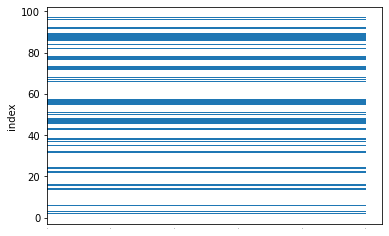

In [62]:
plt.barh(empty_genre.index, 1)
plt.tick_params(axis='x', which='both', length=0, labelsize=0)
plt.ylabel('index', )
plt.show;

Gi·ªõi h·∫°n trong b√†i to√°n n√†y l√† c√°c b√†i h√°t n·∫±m trong __New & hot__ c·ªßa SoundCloud, v√¨ v·∫≠y ph∆∞∆°ng √°n thu th·∫≠p th√™m d·ªØ li·ªáu ƒë∆∞·ª£c lo·∫°i b·ªè. M·∫∑t kh√°c, y√™u c·∫ßu b√†i to√°n l√† l√†m sao t√¨m ra ƒë∆∞·ª£c t√™n g·ªçi c·ªßa th·ªÉ lo·∫°i (genre), do ƒë√≥ kh√¥ng c√≥ t√™n ph√π h·ª£p cho r·ªóng trong tr∆∞·ªùng h·ª£p n√†y. K·∫øt lu·∫≠n, m√¨nh s·∫Ω ti·∫øn h√†nh lo·∫°i b·ªè c√°c d√≤ng d·ªØ li·ªáu ch·ª©a gi√° tr·ªã r·ªóng.

In [63]:
genres_df = genres_df[genres_df != ""]

#### Ph·∫ßn 2: Chu·∫©n h√≥a d·ªØ li·ªáu

Xem c√°c gi√° tr·ªã kh√°c nhau trong thu·ªôc t√≠nh `genre` g·ªìm nh·ªØng gi√° tr·ªã n√†o?

In [64]:
np.unique(genres_df)

array(['Alternative Rock', 'Classical', 'DJ LG DO SF', 'Drum & Bass',
       'FUNK DO MAIOR DE MINAS', 'Hip Hop', 'Hip Hop/Rap',
       'Hip-hop & Rap', 'House', 'Indie', 'OST', 'Pop', 'R&B & Soul',
       'Rap', 'Trap', 'Trap Brasileiro ¬Æ', 'World', 'maharagan',
       'maharaganat'], dtype=object)

Xem l·∫°i c√°c `list_genres` m√¨nh v·ª´a l∆∞u l·∫°i t·ª´ trang web ·ªü ƒë·∫ßu b√†i.

In [65]:
print(list_genres)

['Alternative Rock', 'Ambient', 'Classical', 'Country', 'Dance & EDM', 'Dancehall', 'Deep House', 'Disco', 'Drum & Bass', 'Dubstep', 'Electronic', 'Folk & Singer-Songwriter', 'Hip-hop & Rap', 'House', 'Indie', 'Jazz & Blues', 'Latin', 'Metal', 'Piano', 'Pop', 'R&B & Soul', 'Reggae', 'Reggaeton', 'Rock', 'Soundtrack', 'Techno', 'Trance', 'Trap', 'Triphop', 'World']


ƒê·ªëi s√°nh gi·ªØa c√°c gi√° tr·ªã kh√°c nhau c·ªßa `genres_df` v·ªõi `list_genres`, ta c√≥ c√°c gi√° tr·ªã kh√¥ng n·∫±m trong `list_genres` sau:

In [66]:
for i in np.unique(genres_df):
    if i not in list_genres:
        print(i)

DJ LG DO SF
FUNK DO MAIOR DE MINAS
Hip Hop
Hip Hop/Rap
OST
Rap
Trap Brasileiro ¬Æ
maharagan
maharaganat


Ta th·∫•y:
1. `Hip hop/Rap` t∆∞∆°ng t·ª± v·ªõi `Hip-hop & Rap`. H∆°n n·ªØa, `Hip hop` v√† `Rap` c≈©ng n·∫±m trong `Hip-hop & Rap`, ta ƒë·ªïi c√°c gi√° tr·ªã n√†y v·ªÅ gi√° tr·ªã m·ªõi l√† `Hip-hop & Rap`.
2. `maharagan, maharaganat` l√† m·ªôt th·ªÉ lo·∫°i EDM, n·∫±m trong `Dance & EDM` (https://en.wikipedia.org/wiki/Mahraganat), ta ƒë·ªïi sang gi√° tr·ªã m·ªõi l√† `Dance & EDM`.
3. `Trap Brasileiro ¬Æ` l√† m·ªôt th·ªÉ lo·∫°i n·∫±m trong `Trap` (https://pt.wikipedia.org/wiki/Trap), ta ƒë·ªïi sang gi√° tr·ªã m·ªõi l√† `Trap`.
4. `OST` l√† vi·∫øt t·∫Øt c·ªßa c·ª•m t·ª´ Original Soundtrack, n·∫±m trong `Soundtrack` (https://en.wikipedia.org/wiki/Soundtrack), ta ƒë·ªïi sang gi√° tr·ªã m·ªõi l√† `Soundtrack`.

In [67]:
genres_df[genres_df == "Hip Hop/Rap"] = "Hip-hop & Rap"
genres_df[genres_df == "Hip Hop"] = "Hip-hop & Rap"
genres_df[genres_df == "Rap"] = "Hip-hop & Rap"
genres_df[genres_df == "maharagan"] = "Dance & EDM"
genres_df[genres_df == "maharaganat"] = "Dance & EDM"
genres_df[genres_df == "Trap Brasileiro ¬Æ"] = "Trap"
genres_df[genres_df == "OST"] = "Soundtrack"
genres_df

0     Hip-hop & Rap
1     Hip-hop & Rap
4     Hip-hop & Rap
5              Trap
7     Hip-hop & Rap
          ...      
90    Hip-hop & Rap
91    Hip-hop & Rap
93        Classical
94    Hip-hop & Rap
95    Hip-hop & Rap
Name: genre, Length: 62, dtype: object

Ki·ªÉm tra xem c√°c gi√° tr·ªã kh√°c nhau trong thu·ªôc t√≠nh `genres` ƒë√£ n·∫±m trong `list_genres` ch∆∞a?

In [68]:
for i in np.unique(genres_df):
    if i not in list_genres:
        print(i)

DJ LG DO SF
FUNK DO MAIOR DE MINAS


#### Ph·∫ßn 3: X√°c ƒë·ªãnh outlier:

Nh∆∞ v·∫≠y, d·ª±a v√†o k·∫øt qu·∫£ c·ªßa ph·∫ßn tr∆∞·ªõc c≈©ng nh∆∞ t√¨m ki·∫øm th√¥ng tin tr√™n m·∫°ng, m√¨nh nh·∫≠n th·∫•y t√™n c·ªßa genres l√† `DJ LG DO SF` v√† `FUNK DO MAIOR DE MINAS` kh√¥ng kh·ªõp v·ªõi b·∫•t k√¨ th·ªÉ lo·∫°i nh·∫°c n√†o. M√¨nh x√°c ƒë·ªãnh ƒë√¢y l√† outlier. M√¨nh s·∫Ω ki·ªÉm tra to√†n b·ªô d·ªØ li·ªáu c·ªßa outlier n√†y l·∫ßn cu·ªëi.

In [69]:
genre_outlier = []
for i in np.unique(genres_df):
    if i not in list_genres:
        genre_outlier.append(i)

In [70]:
for i in range(len(trending_df)):
    if trending_df['genre'][i] in genre_outlier:
        print(trending_df.iloc[i, :], end='\n--------------------\n')

artwork_url            https://i1.sndcdn.com/artworks-VkS7zYIAaqx4J80...
caption                                           FUNK DO MAIOR DE MINAS
commentable                                                         True
comment_count                                                       1679
created_at                                          2021-12-02T19:19:35Z
description            GORDAO DO PC E GUI MARQUES\n\nags adicionais\n...
downloadable                                                        True
download_count                                                       456
duration                                                          166191
full_duration                                                     166191
embeddable_by                                                        all
genre                                             FUNK DO MAIOR DE MINAS
has_downloads_left                                                  True
id                                                 

Lo·∫°i b·ªè outlier:

In [71]:
for i in genre_outlier:
    genres_df = genres_df[genres_df != i]

#### Ph·∫ßn 4: Ki·ªÉm tra t√≠nh ƒë√∫ng c·ªßa New & Hot:

B√™n tr√™n, m√¨nh ki·ªÉm tra t√≠nh ƒë√∫ng c·ªßa __Genres__, k·∫ø ti·∫øp m√¨nh ki·ªÉm tra t√≠nh ƒë√∫ng c·ªßa __New & Hot__ ƒë∆∞·ª£c t√≠nh d·ª±a v√†o thu·ªôc t√≠nh `created_at` trong `collection`.

In [72]:
create_date_df = trending_df['created_at']
for i in range(len(create_date_df)):
    create_date_df.iloc[i] = datetime.datetime.strptime(str(trending_df['created_at'][i]),"%Y-%m-%dT%H:%M:%SZ")
create_date_df

0     2021-12-03 01:16:28
1     2021-12-03 03:44:57
2     2021-12-04 07:27:00
3     2021-12-06 22:32:05
4     2021-12-07 02:01:04
             ...         
93    2021-12-03 17:07:27
94    2021-11-29 23:37:39
95    2021-12-01 14:01:06
96    2021-12-07 05:43:24
97    2021-12-07 16:35:33
Name: created_at, Length: 98, dtype: object

In [73]:
sum((datetime.datetime.now() - create_date_df) > datetime.timedelta(30))

0

Nh∆∞ v·∫≠y, t·∫•t c·∫£ c√°c ng√†y ƒë·ªÅu c√≥ s·ªë ng√†y c√°ch th·ªùi ƒëi·ªÉm hi·ªán t·∫°i d∆∞·ªõi 30 ng√†y, ƒëi·ªÅu ƒë√≥ ch·ª©ng t·ªè ƒë√¢y ƒë·ªÅu l√† nh·ªØng b√†i h√°t m·ªõi tr√™n n·ªÅn t·∫£ng SoundCloud.

#### Ph·∫ßn 5: K·∫øt lu·∫≠n:

Quay tr·ªü l·∫°i v·ªõi `genres_df`, m√¨nh xem t·∫ßn su·∫•t xu·∫•t hi·ªán ƒë·ªÉ t√¨m ra th·ªÉ lo·∫°i theo v·∫•n ƒë·ªÅ ƒë·∫∑t ƒë·∫ßu b√†i.

In [74]:
names, counts = np.unique(genres_df, return_counts=True)
total_genres = pd.DataFrame(counts, index=names, columns=["counts"])
total_genres.sort_values(['counts'], ascending=False)

counts
Hip-hop & Rap         40
World                  4
Trap                   3
Dance & EDM            2
House                  2
Pop                    2
R&B & Soul             2
Alternative Rock       1
Classical              1
Drum & Bass            1
Indie                  1
Soundtrack             1

Nh∆∞ v·∫≠y, th·ªÉ lo·∫°i `"Hip-hop & Rap"` l√† th·ªÉ lo·∫°i ph·ªï bi·∫øn nh·∫•t trong danh s√°ch `New & hot` tr√™n trang SoundCloud t·∫°i th·ªùi ƒëi·ªÉm: `2021-12-11 10:03:30`.

#### Ph·∫ßn 6: T√¨m hi·ªÉu th√™m v·ªÅ t√≠nh hot trong d·ªØ li·ªáu:

·ªû ph·∫ßn n√†y, t√≠nh hot ƒë∆∞·ª£c t√≠nh to√°n v√† ghi l·∫°i trong thu·ªôc t√≠nh `score` ·ª©ng v·ªõi t·ª´ng tracks t√¨m ƒë∆∞·ª£c trong response. M√¨nh ch·ªâ ch·ªçn ra v√†i thu·ªôc t√≠nh thu·ªôc lo·∫°i `numerical`, m·ª•c ƒë√≠ch ƒë·ªÉ x·ª≠ l√Ω v√† visuallization.

In [75]:
numerical_col = ['comment_count', 'download_count', 'likes_count', 'playback_count','reposts_count']

In [76]:
numerical_df = trending_df[numerical_col]
numerical_df = numerical_df.apply(pd.to_numeric)
numerical_df.head()

comment_count  download_count  likes_count  playback_count  reposts_count
0         4936.0               0        59925         1746991           1875
1          508.0               0        36561         1224547            451
2        11847.0            1000        78540          986094           6140
3          190.0               0        12950          450966            153
4          615.0               0        14541          298956            277

In [77]:
numerical_df.describe(include='all')

comment_count  download_count   likes_count  playback_count  \
count      97.000000       98.000000     98.000000    9.800000e+01   
mean      366.000000       19.551020  12766.163265    2.712207e+05   
std      1300.692316      111.723805  13835.817089    2.947792e+05   
min         1.000000        0.000000    563.000000    2.592600e+04   
25%        37.000000        0.000000   2654.250000    6.216825e+04   
50%       117.000000        0.000000   7987.500000    1.464630e+05   
75%       281.000000        0.000000  18014.750000    4.276538e+05   
max     11847.000000     1000.000000  78540.000000    1.746991e+06   

       reposts_count  
count      98.000000  
mean      228.102041  
std       646.384815  
min         5.000000  
25%        37.250000  
50%       114.500000  
75%       216.000000  
max      6140.000000

`comment_count` c√≥ 97 gi√° tr·ªã kh√°c non-NA/null trong 98 d√≤ng d·ªØ li·ªáu.

In [78]:
numerical_df[numerical_df['comment_count'].isnull()]

comment_count  download_count  likes_count  playback_count  reposts_count
7            NaN               0         3005          129959             43

N·∫øu xem `index` t∆∞∆°ng ƒë∆∞∆°ng v·ªõi v·ªã tr√≠ (rank) trong b·∫£ng x·∫øp h·∫°ng trending, th√¨ m√¨nh t·∫°m d√πng `index` nh∆∞ v·ªã tr√≠. M√¨nh xem m·ªëi t∆∞∆°ng quan gi·ªØa v·ªã tr√≠ v√† c√°c thu·ªôc t√≠nh trong `numerical_df`.

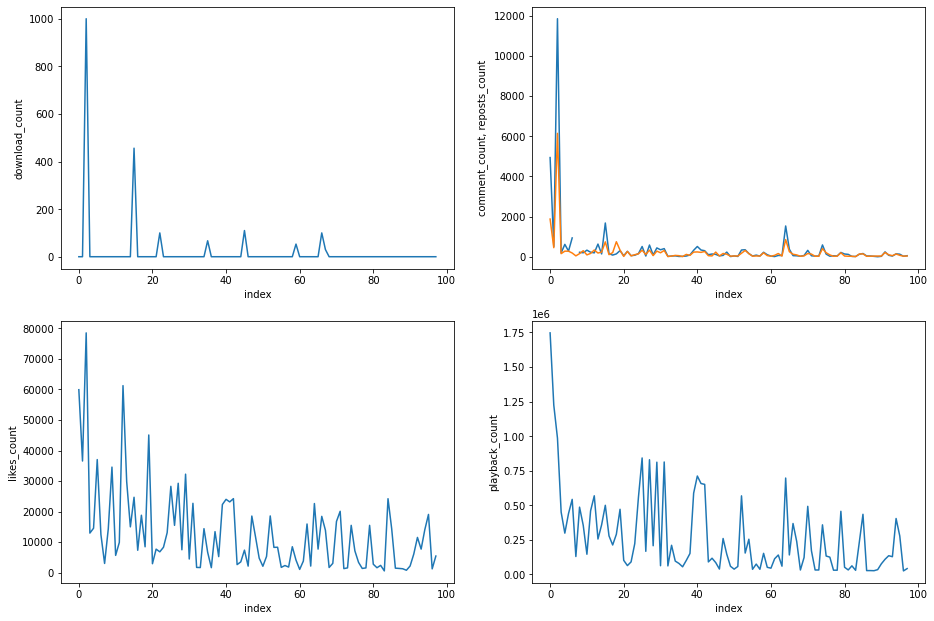

In [79]:
fig, ax = plt.subplots(2,2)
fig.subplots_adjust(left=0, right=2, top=2, bottom=0, hspace=0.2, wspace=0.2)

ax[0, 0].plot(numerical_df['download_count'])
ax[1, 0].plot(numerical_df['likes_count'])
ax[0, 1].plot(numerical_df['comment_count'])
ax[0, 1].plot(numerical_df['reposts_count'])
ax[1, 1].plot(numerical_df['playback_count'])

ax[0, 0].set_xlabel('index')
ax[0, 0].set_ylabel('download_count')
ax[1, 0].set_xlabel('index')
ax[1, 0].set_ylabel('likes_count')
ax[0, 1].set_xlabel('index')
ax[0, 1].set_ylabel('comment_count, reposts_count')
ax[1, 1].set_xlabel('index')
ax[1, 1].set_ylabel('playback_count')

plt.show()

- D·ªÖ d√†ng th·∫•y, c√°c tracks c√≥ l∆∞·ª£t like, l∆∞·ª£t nghe cao gi√∫p c√°c tracks c√≥ tƒÉng ƒë·ªô hot v√† ƒë·ª©ng ƒë·∫ßu b·∫£ng x·∫øp h·∫°ng. L∆∞·ª£t t·∫£i, l∆∞·ª£t b√¨nh lu·∫≠n, l∆∞·ª£t repost c≈©ng t·∫≠p trung ·ªü c√°c tracks ƒë·ª©ng ƒë·∫ßu b·∫£ng x·∫øp h·∫°ng.
- Hai thu·ªôc t√≠nh l√† `comment_count` v√† `reposts_count` c√≥ bi·∫øn ƒë·ªông t∆∞∆°ng t·ª± nhau. Hai thu·ªôc t√≠nh ƒë·∫°t gi√° tr·ªã cao t·∫≠p trung ·ªü c√°c tracks ƒë·ª©ng ƒë·∫ßu.

---